## Logistic Regression(Binomial)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
clf = LogisticRegression(max_iter=100000,random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=0)

In [ ]:
acc = accuracy_score(y_test, clf.predict(X_test))*100
print(acc)

96.49122807017544


## Logistic Regression(Multinomial)

In [ ]:
from string import digits
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

digits = datasets.load_digits()

X = digits.data
y = digits.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
reg = linear_model.LogisticRegression(max_iter=10000,random_state=0)
reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [ ]:
y_pred = reg.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)*100
print(acc)

96.66203059805285


# SVM(Support Vector Machine)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

In [ ]:
cancer = load_breast_cancer()
X = cancer.data[:,:2]
y = cancer.target

In [ ]:
svm = SVC(kernel='rbf', C=1, gamma=0.5)
svm.fit(X,y)

SVC(C=1, gamma=0.5)

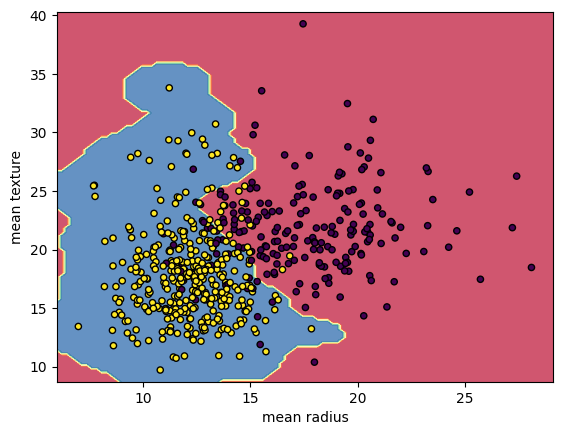

In [ ]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    cmap=plt.cm.Spectral,
    response_method="predict",
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
    )
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")

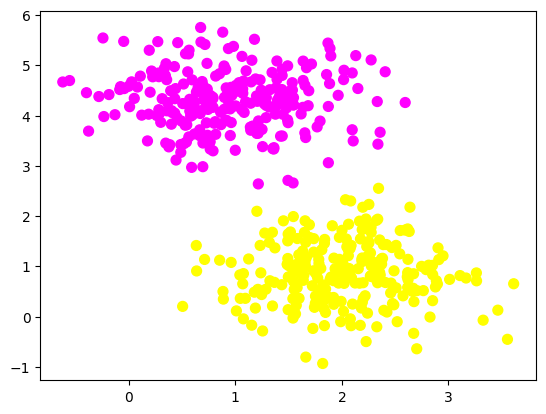

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.6)

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring');
plt.show()

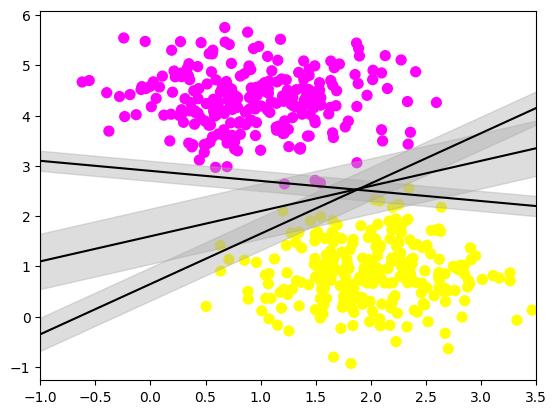

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
    color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);
plt.show()

# Stochastic Gradient Descent Classifier

In [ ]:
# importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf = SGDClassifier(loss='log_loss', random_state=42, max_iter=1000, alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='log_loss', random_state=42)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9555555555555556


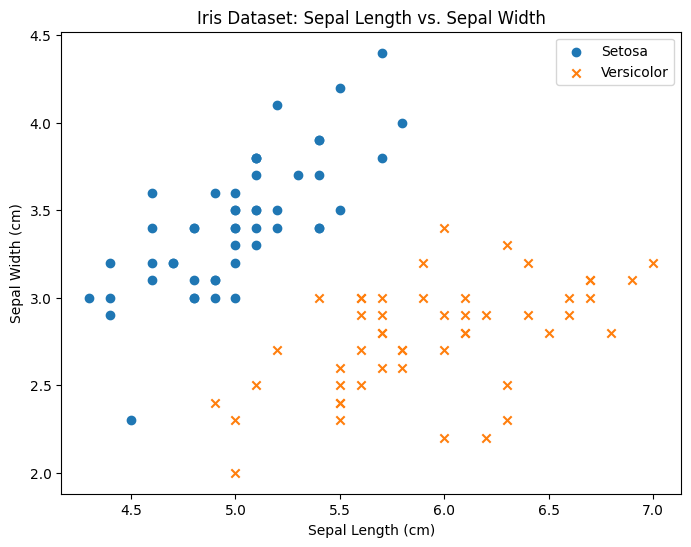

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Setosa", marker="o")
plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Versicolor", marker="x")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend()
plt.title("Iris Dataset: Sepal Length vs. Sepal Width")
plt.show()

In [ ]:
# Print the classification report
class_names = data.target_names
report = classification_report(y_test, y_pred, target_names=class_names)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



# KNN implementation from scratch

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def euclidean_distance(point1, point2):
  return np.sqrt(np.sum(np.array(point1) - np.array(point2))**2)

In [ ]:
def knn_predict(training_data, training_labels, test_point, k):
  distances = []
  for i in range(len(training_data)):
    dist = euclidean_distance(training_data[i], test_point)
    distances.append((dist, training_labels[i]))
  distances.sort(key=lambda x: x[0])
  k_nearest_labels = [label for _, label in distances[:k]]
  return Counter(k_nearest_labels).most_common(1)[0][0]

In [ ]:
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3

In [ ]:
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


# Gaussian Naive Bayes

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
iris = load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['Species'] = iris.target

X = data.drop("Species", axis=1)
y = data['Species']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

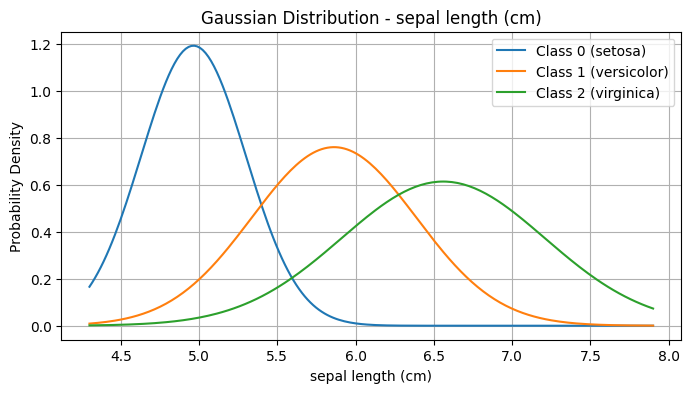

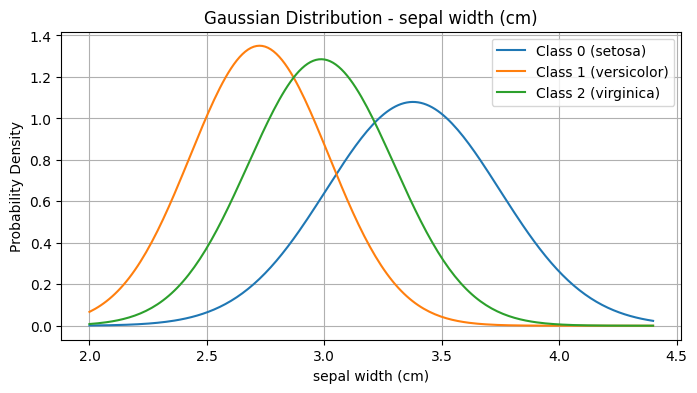

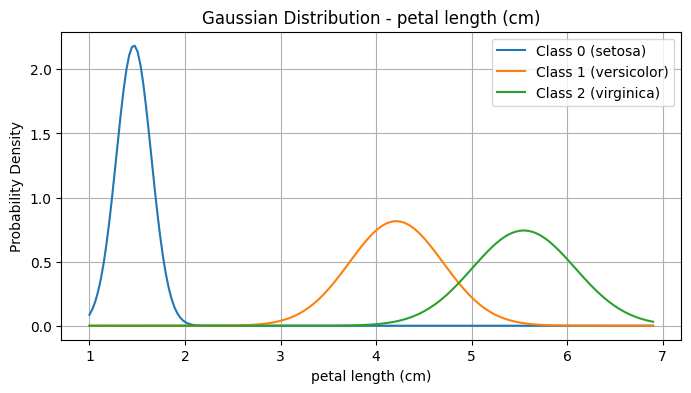

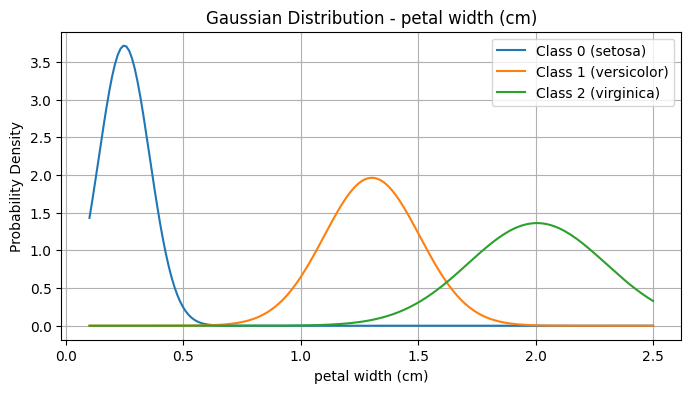

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

feature_names = iris.feature_names
num_features = len(feature_names)
num_classes = len(np.unique(y))

X_np = X.to_numpy()

for feature_index in range(num_features):
    feature_name = feature_names[feature_index]
    x_vals = np.linspace(X_np[:, feature_index].min(), X_np[:, feature_index].max(), 200)

    plt.figure(figsize=(8, 4))

    for cls in range(num_classes):
        mean = gnb.theta_[cls, feature_index]
        std = np.sqrt(gnb.var_[cls, feature_index])
        y_vals = norm.pdf(x_vals, mean, std)
        plt.plot(x_vals, y_vals, label=f"Class {cls} ({iris.target_names[cls]})")

    plt.title(f"Gaussian Distribution - {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid(True)

    plt.show()

In [ ]:
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"The Accuracy of Prediction on Iris Flower is: {accuracy}")

The Accuracy of Prediction on Iris Flower is: 0.9777777777777777


# Multinomial Naive Bayes

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
data = {
    'text': [
        'Free money now',
        'Call now to claim your prize',
        'Meet me at the park',
        'Let’s catch up later',
        'Win a new car today!',
        'Lunch plans?',
        'Congratulations! You won a lottery',
        'Can you send me the report?',
        'Exclusive offer for you',
        'Are you coming to the meeting?'
    ],
    'label': ['spam', 'spam', 'not spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam', 'spam', 'not spam']
}

df = pd.DataFrame(data)
df

,text,label
0,Free money now,spam
1,Call now to claim your prize,spam
2,Meet me at the park,not spam
3,Let’s catch up later,not spam
4,Win a new car today!,spam
5,Lunch plans?,not spam
6,Congratulations! You won a lottery,spam
7,Can you send me the report?,not spam
8,Exclusive offer for you,spam
9,Are you coming to the meeting?,not spam


In [ ]:
df['label'] = df['label'].map({'spam': 1, 'not spam': 0})
df

,text,label
0,Free money now,1
1,Call now to claim your prize,1
2,Meet me at the park,0
3,Let’s catch up later,0
4,Win a new car today!,1
5,Lunch plans?,0
6,Congratulations! You won a lottery,1
7,Can you send me the report?,0
8,Exclusive offer for you,1
9,Are you coming to the meeting?,0


In [ ]:
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vectors, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

Accuracy: 66.67%



In [ ]:
custom_message = ["Congratulations, you are going to get a free vacation"]
custom_vector = vectorizer.transform(custom_message)
prediction = model.predict(custom_vector)
print("Prediction for custom message:", "Spam" if prediction[0] == 1 else "Not Spam")

Prediction for custom message: Spam


# Bernoulli Distribution

In [ ]:
df=pd.read_csv("spam_ham_dataset.csv")
print(df.shape)
print(df.columns)
df= df.drop(['Unnamed: 0'], axis=1)

(5171, 4)
Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [ ]:
df

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\nthe transport v...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\nhpl ...,0
5168,ham,Subject: calpine daily gas nomination\n>\n>\nj...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
x = df["text"].values
y = df["label_num"].values

cv = CountVectorizer()

x = cv.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)\

bnb = BernoulliNB(binarize=0.0)
model = bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       732
           1       0.92      0.56      0.70       303

    accuracy                           0.86      1035
   macro avg       0.88      0.77      0.80      1035
weighted avg       0.87      0.86      0.84      1035



# Decision Tree

In [ ]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [ ]:
# Function to import the dataset
def importdata():
    balance_data = pd.read_csv(
        'https://archive.ics.uci.edu/ml/machine-learning-' +
        'databases/balance-scale/balance-scale.data',
        sep=',', header=None)

    # Displaying dataset information
    print("Dataset Length: ", len(balance_data))
    print("Dataset Shape: ", balance_data.shape)
    print("Dataset: ", balance_data.head())

    return balance_data

In [ ]:
# Function to split the dataset into features and target variables
def splitdataset(balance_data):

    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]

    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=100)

    return X, Y, X_train, X_test, y_train, y_test

In [ ]:
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion="gini",
                                      random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [ ]:
def train_using_entropy(X_train, X_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
        criterion="entropy", random_state=100,
        max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_entropy.fit(X_train, y_train)
    return clf_entropy

In [ ]:
# Function to make predictions
def prediction(X_test, clf_object):
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

# Placeholder function for cal_accuracy
def cal_accuracy(y_test, y_pred):
    print("Confusion Matrix: ",
          confusion_matrix(y_test, y_pred))
    print("Accuracy : ",
          accuracy_score(y_test, y_pred)*100)
    print("Report : ",
          classification_report(y_test, y_pred))

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree
# Function to plot the decision tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, filled=True, feature_names=feature_names, class_names=class_names, rounded=True)
    plt.show()

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5


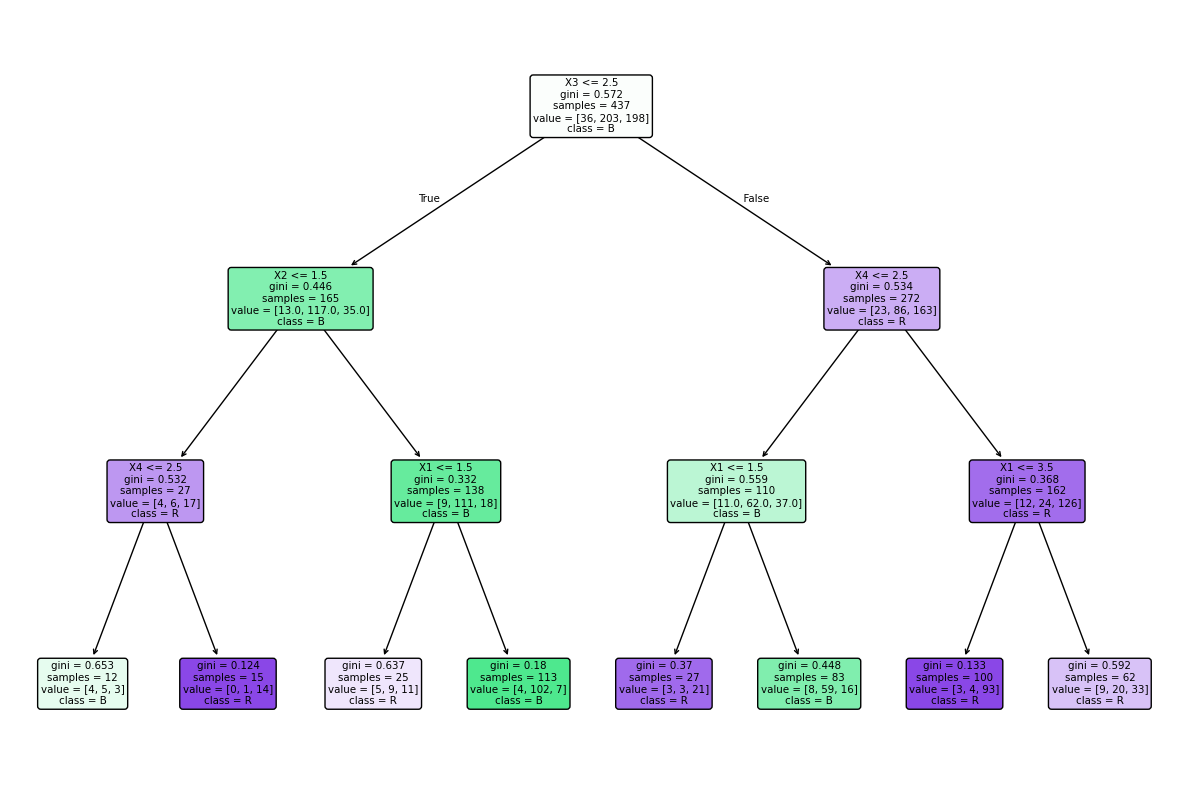

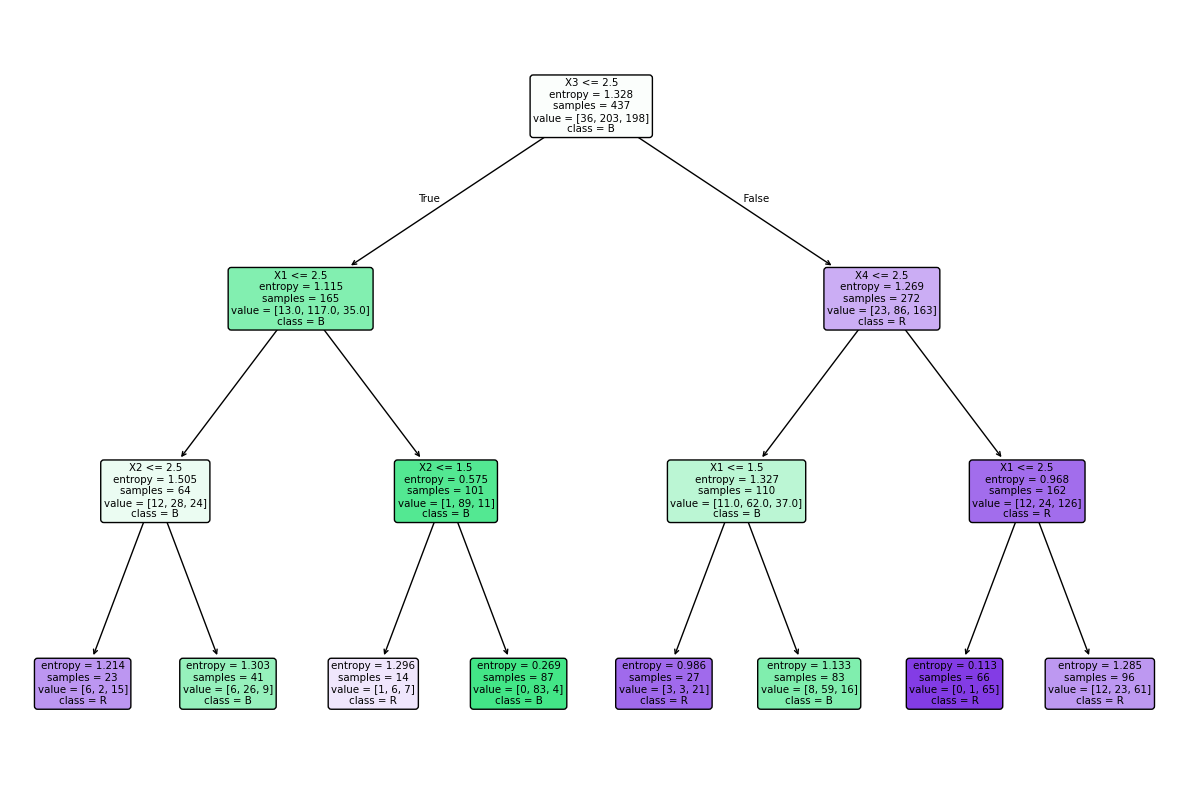

In [ ]:
if __name__ == "__main__":
    data = importdata()
    X, Y, X_train, X_test, y_train, y_test = splitdataset(data)

    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = train_using_entropy(X_train, X_test, y_train)

    # Visualizing the Decision Trees
    plot_decision_tree(clf_gini, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])
    plot_decision_tree(clf_entropy, ['X1', 'X2', 'X3', 'X4'], ['L', 'B', 'R'])

In [ ]:
# Operational Phase
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 67 18]
 [ 0 19 71]]
Accuracy :  73.40425531914893
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
['R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L'
 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L'
 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'L' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'L' 'R'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 0 63 22]
 [ 0 20 70]]
Accuracy :  70.74468085106383
Report :                precision    recall  f1-score   support

           B       0.00      0.00      0.00 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Ensemble learning

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=10,
    bootstrap=True,
    random_state=0
)

In [ ]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


# Ada Boost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load dataset (assuming CSV download or seaborn)
df = pd.read_csv('titanic.csv')

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'Fare']
X = df[features]
y = df['Survived']

# Impute missing ages
imp = SimpleImputer(strategy='median')
X['Age'] = imp.fit_transform(X[['Age']])

# One-hot encode 'Sex' and 'Pclass'
X = pd.get_dummies(X, columns=['Sex', 'Pclass'], drop_first=True)

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=3, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8100558659217877


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=3),
    n_estimators=50,
    learning_rate=1.0,
    random_state=0
)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.8547486033519553


In [ ]:
from sklearn.metrics import classification_report

print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("AdaBoost Report:\n", classification_report(y_test, y_pred_ada))


Decision Tree Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179

AdaBoost Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

